<a href="https://colab.research.google.com/github/antahiap/dsr-b35/blob/main/dsr-time-series/notebooks/09_prophet_for_air_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python
import pandas as pd
from prophet import Prophet

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Load the dataset
file_path = 'https://raw.githubusercontent.com/andandandand/time-series-dsr/main/time_series_data/airPassengers.csv'
df = pd.read_csv(file_path)

In [9]:
df = df.rename(columns={'Month':'ds', 'Passengers':'y'})

In [10]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm_bhkpp/mddqtiae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm_bhkpp/avcc3ewo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83149', 'data', 'file=/tmp/tmpvm_bhkpp/mddqtiae.json', 'init=/tmp/tmpvm_bhkpp/avcc3ewo.json', 'output', 'file=/tmp/tmpvm_bhkpp/prophet_modeles2kmflh/prophet_model-20230903150237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,1961-11-27,499.573534,469.740900,529.159365
505,1961-11-28,497.972130,468.746527,527.916731
506,1961-11-29,495.649432,465.391656,523.044008
507,1961-11-30,492.646963,464.513602,521.583104
508,1961-12-01,489.023969,460.232573,517.960692


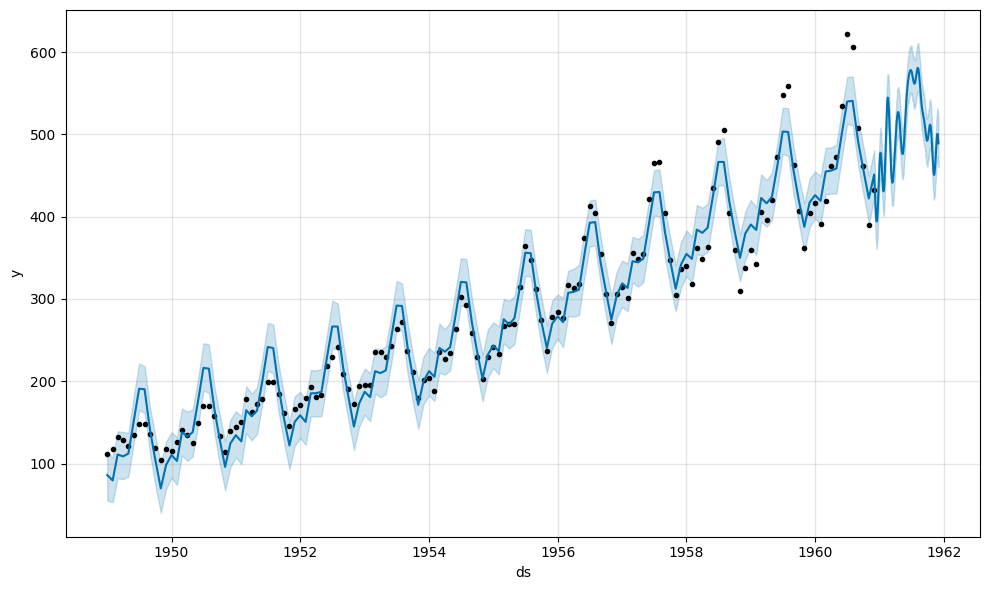

In [14]:
fig1 = m.plot(forecast)

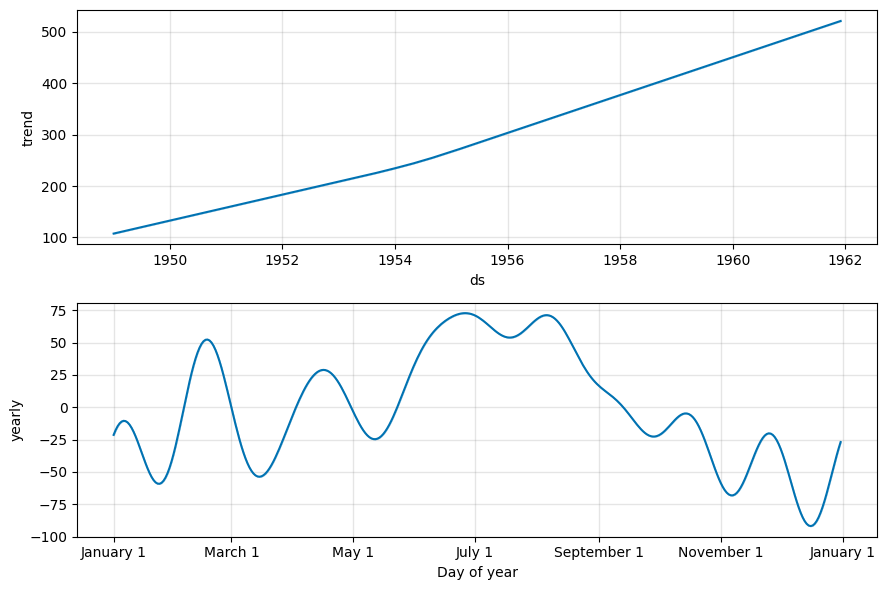

In [15]:
fig2 = m.plot_components(forecast)